# Functions

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def univariate_analysis_numerical(df, column_name):
    # Check if the column is numerical
    if df[column_name].dtype in ['int64', 'float64']:
        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column_name], kde=True)
        plt.title('Histogram')

        # Plot boxplot
        plt.subplot(1, 3, 2)
        plt.boxplot(df[column_name],patch_artist=True, notch=True)
        # Detect those values that are extreme outliers, more than 3 times the IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        # Add one to the column named ext_univar_outlier
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
        df.loc[outliers, 'ext_univar_outlier'] += 1

        # check if any outliers are over the upper bound
        if df[column_name].max() > upper_bound:
            plt.axhline(y=upper_bound, color='r', linestyle='--', linewidth=1)
        if df[column_name].min() < lower_bound:
            plt.axhline(y=lower_bound, color='r', linestyle='--', linewidth=1)


        plt.show()
        return df

    else:
        print("The specified column is not numerical.")
        return df
    
def univariate_analysis_categorical(df, column_name):
    # Check if the column is categorical
    if df[column_name].dtype == 'object':
        # Plot bar chart
        if column_name == 'differentiate':
            # change the names
            df[column_name] = df[column_name].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                                       "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
            # plot the graph following the order
            plt.figure()
            sns.countplot(x=df[column_name], order=['well diff', 'mod diff', 'poor diff', 'undiff'])
            plt.title('Bar Chart')

        elif column_name == '6th Stage':
            plt.figure()
            sns.countplot(x=df[column_name], order=['IIA','IIB','IIIA','IIIB','IIIC'])
            plt.title('Bar Chart')
            
        else:
            plt.figure()
            sns.countplot(x=df[column_name])
            plt.title('Bar Chart')
       

    else:
        print("The specified column is not categorical.")

def bivariate_numerical(df):
    target_variable = 'Status'
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    sns.pairplot(df[num_vars], hue='Status')
    
    df_melted = df.melt(id_vars=target_variable, value_vars=num_vars)

    # Create a box plot categorized by the categorical variable on the y-axis
    sns.catplot(x='variable', y='value', hue=target_variable, kind='box', data=df_melted, height=6, aspect=2)

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

def bivariate_categorical(df):
    target_variable = 'Status'
    cat_vars = df.select_dtypes(include=['object']).columns
    # drop grade and status
    cat_vars = cat_vars.drop('Grade')
    cat_vars = cat_vars.drop('Status')
    
    for i,cat_var in enumerate(cat_vars):
        # Calculate the row and column number for the subplot knowing there are 3 columns and 3 rows
        row = i//3
        col = i%3
        if cat_var == '6th Stage':
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = ['IIA','IIB','IIIA','IIIB','IIIC']
        else:
            if cat_var == 'differentiate':
                df[cat_var] = df[cat_var].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                               "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
        
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = pd.Series(df[cat_var].unique())
        
        fig, ax = join_barcharts(cat_var_positive, cat_var_negative, classes, title=cat_var, xlabel=cat_var, ylabel='Proportion', legend_labels=('Alive', 'Dead'))

def join_barcharts(data1, data2, labels, title='', xlabel='', ylabel='', legend_labels=('Positive', 'Negative')):
    
    n = len(labels)
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(nrows=3, ncols=3)
    index = np.arange(n)
    rects1 = ax.bar(index, data1, width, label=legend_labels[0])
    rects2 = ax.bar(index + width, data2, width, label=legend_labels[1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index + width / 2)
    ax.set_xticklabels(labels)
    ax.legend()

    return fig, ax
    


# Importing the Dataset

c:\Users\JaIk194\Documents\Master\Q2\ML\Project\BreastCancerClassification
Race
Race
White    0.851819
Other    0.084214
Black    0.063967
Name: proportion, dtype: float64
Race
White    0.827922
Black    0.118506
Other    0.053571
Name: proportion, dtype: float64


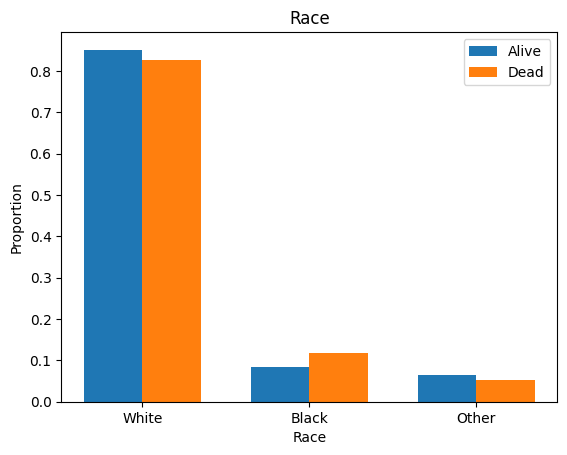

Marital Status
Marital Status
Married      0.670481
Single       0.149941
Divorced     0.116197
Widowed      0.054577
Separated    0.008803
Name: proportion, dtype: float64
Marital Status
Married      0.581169
Single       0.168831
Divorced     0.146104
Widowed      0.079545
Separated    0.024351
Name: proportion, dtype: float64


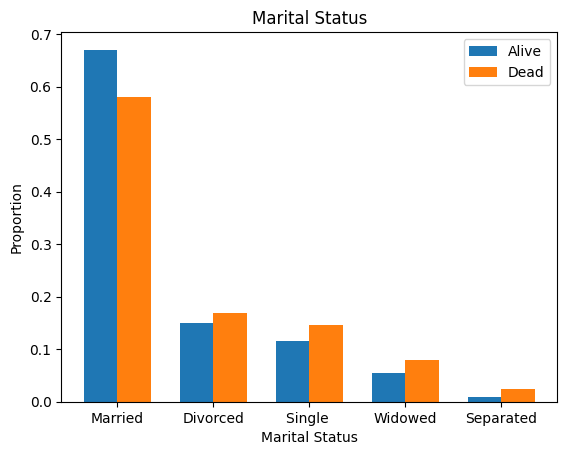

T Stage
T Stage
T2    0.435153
T1    0.424296
T3    0.122359
T4    0.018192
Name: proportion, dtype: float64
T Stage
T2    0.491883
T1    0.254870
T3    0.188312
T4    0.064935
Name: proportion, dtype: float64


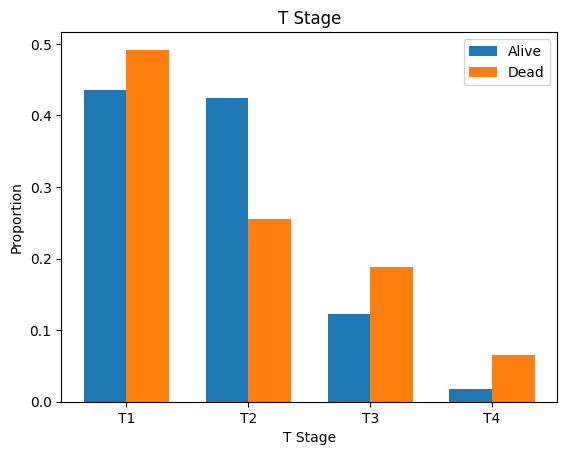

N Stage
N Stage
N1    0.722418
N2    0.192195
N3    0.085387
Name: proportion, dtype: float64
N Stage
N1    0.438312
N3    0.293831
N2    0.267857
Name: proportion, dtype: float64


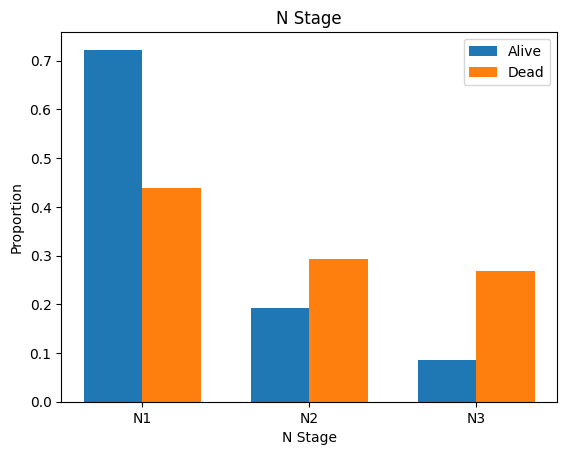

6th Stage
6th Stage
IIA     0.354754
IIB     0.291960
IIIA    0.254108
IIIC    0.085387
IIIB    0.013791
Name: proportion, dtype: float64
6th Stage
IIIA    0.298701
IIIC    0.293831
IIB     0.219156
IIA     0.155844
IIIB    0.032468
Name: proportion, dtype: float64


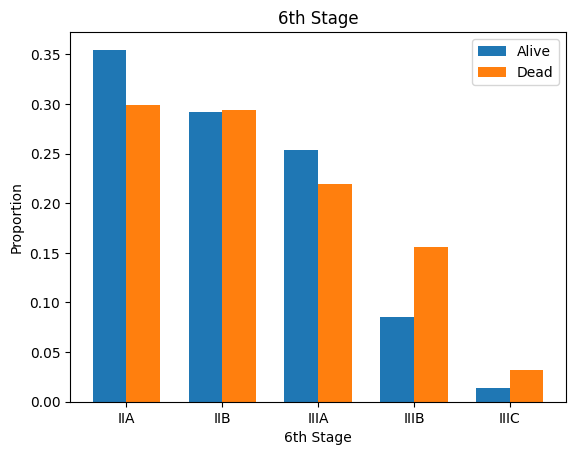

differentiate
differentiate
mod diff     0.600352
poor diff    0.248826
well diff    0.147887
undiff       0.002934
Name: proportion, dtype: float64
differentiate
mod diff     0.495130
poor diff    0.426948
well diff    0.063312
undiff       0.014610
Name: proportion, dtype: float64


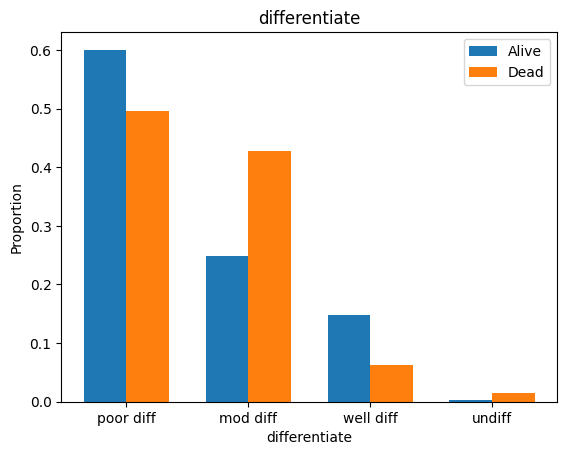

A Stage
A Stage
Regional    0.983275
Distant     0.016725
Name: proportion, dtype: float64
A Stage
Regional    0.943182
Distant     0.056818
Name: proportion, dtype: float64


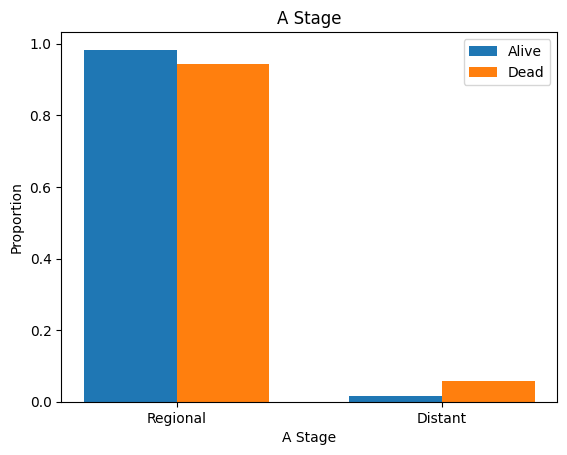

Estrogen Status
Estrogen Status
Positive    0.952758
Negative    0.047242
Name: proportion, dtype: float64
Estrogen Status
Positive    0.824675
Negative    0.175325
Name: proportion, dtype: float64


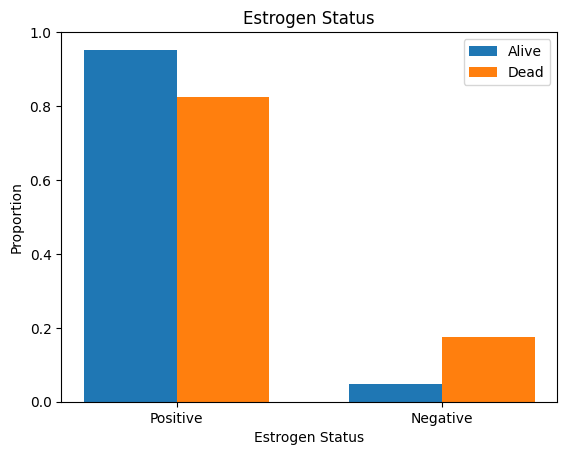

Progesterone Status
Progesterone Status
Positive    0.855047
Negative    0.144953
Name: proportion, dtype: float64
Progesterone Status
Positive    0.668831
Negative    0.331169
Name: proportion, dtype: float64


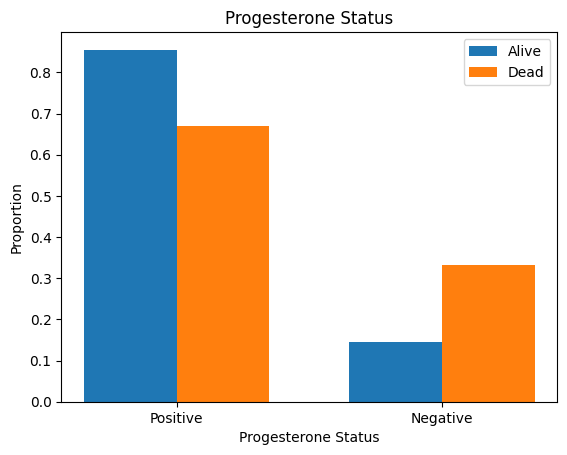

In [67]:
import pandas as pd
import os
#parent_directory = os.path.dirname(os.getcwd())
#os.chdir(parent_directory)
print(os.getcwd())
#EDA on numerical variables
# Load the dataset

df_breast_cancer = pd.read_csv('data/Breast_Cancer.csv', sep=",", header=0)
'''df_breast_cancer["ext_univar_outlier"] = 0

for column in df_breast_cancer.columns:
    if column not in ['ext_univar_outlier']:
        #df_breast_cancer = univariate_analysis_numerical(df_breast_cancer, column)
        univariate_analysis_categorical(df_breast_cancer, column)
df_breast_cancer.to_csv('data/Breast_Cancer_outliers.csv', index=False)'''
#bivariate_numerical(df_breast_cancer[['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive','Survival Months','Status']])
bivariate_categorical(df_breast_cancer)
